In [22]:
files <- dir("functions",full.names=TRUE)
for(i in 1:length(files)) source(files[i])

ERROR: Error in source(files[i]): functions/functions_exercise2.R:46:3: uventet '}'
45:     P_est  <- # reconstructed covariance
46:   }
      ^


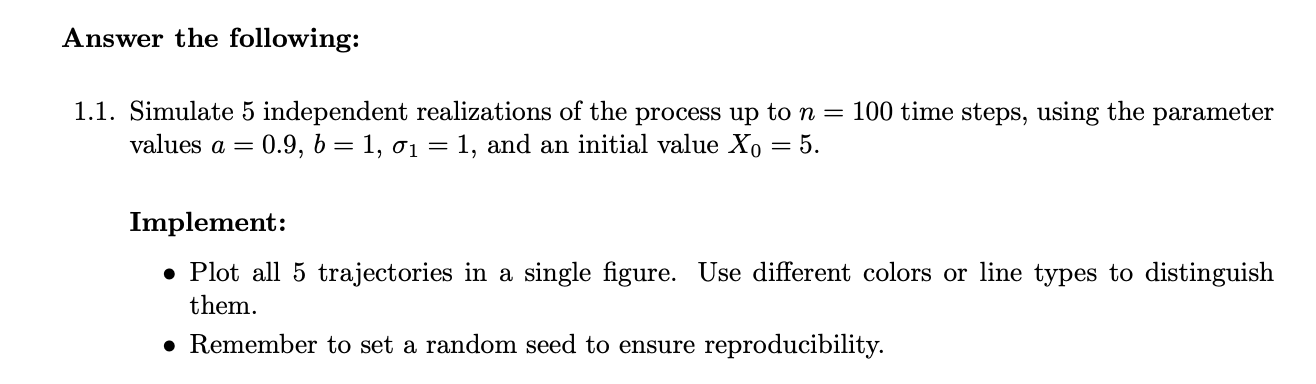

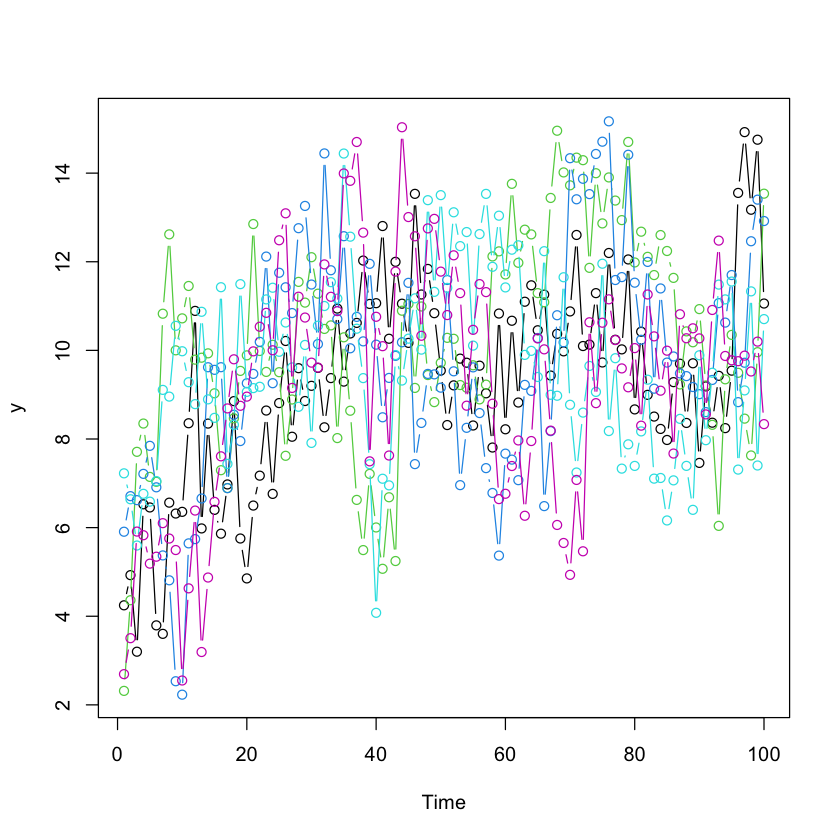

In [21]:
set.seed(25)
A <- 0.9
B <- 1
C <- 1
X0 <- 5
n <- 100
y <- matrix(NA, nrow = n, ncol = 5)
for (j in 1:5){
X <- X0
for (i in 1:n){
    X <- A * X + B + rnorm(1)
    y[i,j] <- C*X +  rnorm(1)
}
}

par(bg="white")
plot(y[,1], type="b", xlab="Time", ylab="y", ylim=range(y,na.rm=TRUE))
for (i in 2:5){
    lines(y[,i], type="b",col = i+1)
}


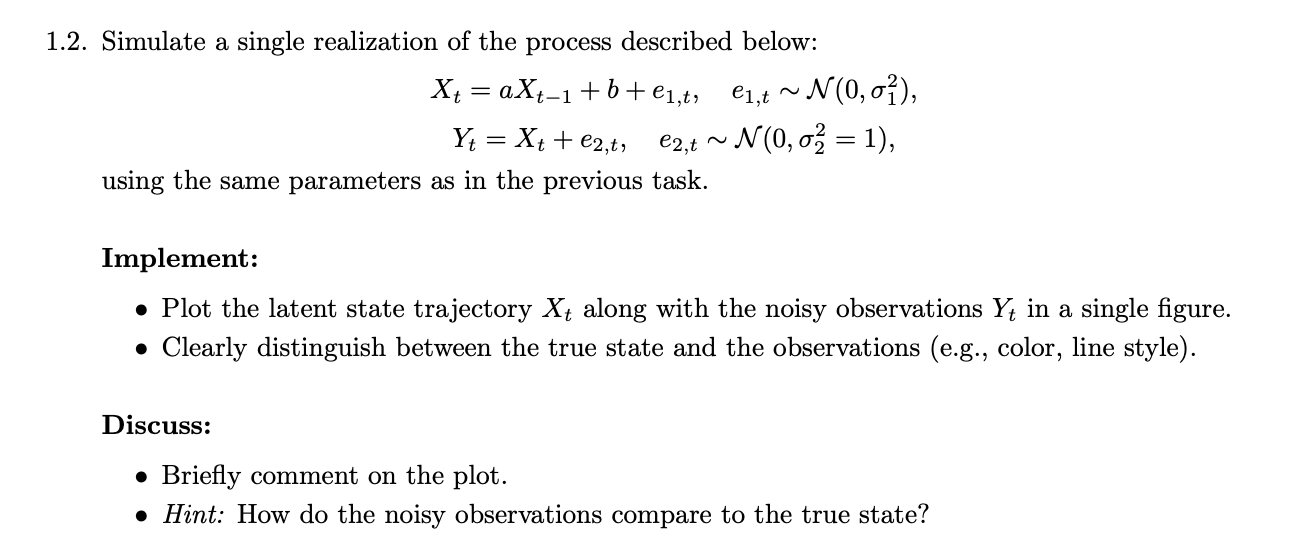

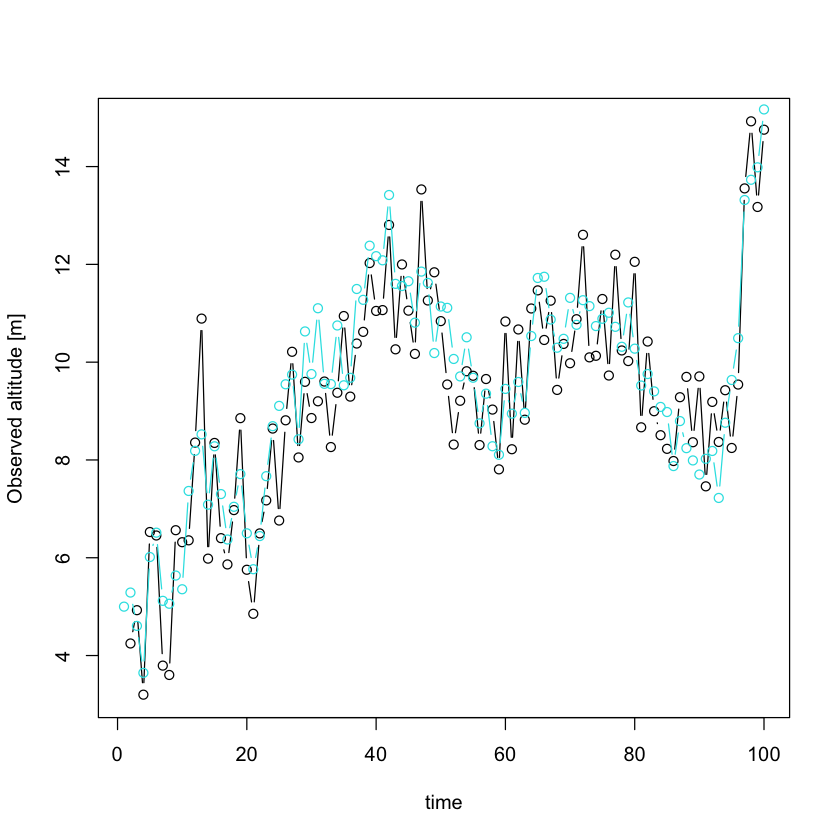

In [18]:
set.seed(25)
A <- 0.9
B <- 1
C <- 1
X0 <- 5
n <- 100
X <- matrix(NA, n)
y <- matrix(NA, n)

X[1] <- X0
for (i in 2:n){
    X[i] <- A * X[i-1] + B + rnorm(1)
    y[i] <- C*X[i] +  rnorm(1)
}

par(bg="white")
plot(y, type="b", xlab="time", ylab="Observed altitude [m]", ylim=range(y,na.rm=TRUE))
lines(X, type="b",col=5)